<a href="https://colab.research.google.com/github/dimasarinugroho/Project/blob/master/PenugasanBRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import sklearn.metrics
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus
import seaborn as sns

#menampilkan data secara keseluruhan
df = pd.read_csv('/content/sample_data/StudentsPerformance.csv')

#df = pd.DataFrame(dataset)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
# Menampilkan jumlah missing data pada setiap kolom

df.isnull().sum()
#setelah di compile tidak ada data yang memiliki kolom kosong, artinya data tersebut sudah baik

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# Membersihkan setiap baris yang didalamnya terdapat missing data
df_clean = df.dropna()

df_clean.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.3+ KB


In [ ]:
df_clean_male = df_clean[df_clean["gender"].isin(["male"])]
print('Tabel Siswa Laki-Laki')
df_clean_male.head(10)

Tabel Siswa Laki-Laki


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52
11,male,group D,associate's degree,standard,none,40,52,43
13,male,group A,some college,standard,completed,78,72,70
16,male,group C,high school,standard,none,88,89,86
18,male,group C,master's degree,free/reduced,completed,46,42,46
20,male,group D,high school,standard,none,66,69,63


In [ ]:
# Membersihkan setiap baris pada tabel siswa laki-laki yang didalamnya terdapat missing data
df_clean_lakilaki = df_clean_male.dropna()

df_clean_male.describe()

,math score,reading score,writing score
count,482.000000,482.000000,482.000000
mean,68.728216,65.473029,63.311203
std,14.356277,13.931832,14.113832
min,27.000000,23.000000,15.000000
25%,59.000000,56.000000,53.000000
50%,69.000000,66.000000,64.000000
75%,79.000000,75.000000,73.750000
max,100.000000,100.000000,100.000000


In [ ]:
df_clean_female = df_clean[df_clean["gender"].isin(["female"])]
print('Tabel Siswa Perempuan')
df_clean_female.head(10)

Tabel Siswa Perempuan


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
9,female,group B,high school,free/reduced,none,38,60,50
12,female,group B,high school,standard,none,65,81,73
14,female,group A,master's degree,standard,none,50,53,58
15,female,group C,some high school,standard,none,69,75,78
17,female,group B,some high school,free/reduced,none,18,32,28


In [ ]:
# Membersihkan setiap baris pada tabel siswa laki-laki yang didalamnya terdapat missing data
df_clean_perempuan = df_clean_female.dropna()

df_clean_female.describe()

,math score,reading score,writing score
count,518.000000,518.000000,518.000000
mean,63.633205,72.608108,72.467181
std,15.491453,14.378245,14.844842
min,0.000000,17.000000,10.000000
25%,54.000000,63.250000,64.000000
50%,65.000000,73.000000,74.000000
75%,74.000000,83.000000,82.000000
max,100.000000,100.000000,100.000000


In [ ]:
# mengambil data pada kolom test preparation course
preparation_course = df['test preparation course']

# proses rekap
rekapPreparation = {}

for row in preparation_course:
  if row in rekapPreparation:
    rekapPreparation[row] += 1
  else:
    rekapPreparation[row] = 1
 
# cetak rekap
print("Jumlah Siswa yang sudah menyelesaikan ujian:")
print(rekapPreparation)

#didapat jumlah siswa yang belum menyelesaikan ujian sebanyak 642 dan yang sudah sebanyak 358

Jumlah Siswa yang sudah menyelesaikan ujian:
{'none': 642, 'completed': 358}


In [ ]:
# mengambil data pada kolom gender
test_gender = df['gender']

# proses rekap
rekapGender = {}

for row in test_gender:
  if row in rekapGender:
    rekapGender[row] += 1
  else:
    rekapGender[row] = 1
 
# cetak rekap
print("Jumlah Siswa Male dan Female masing-masing:")
print(rekapGender)

#didapat jumlah siswa perempuan sebanyak 518 dan siswa laki-laki sebanyak 482

Jumlah Siswa Male dan Female masing-masing:
{'female': 518, 'male': 482}


In [ ]:
# Menghitung rata-rata dan nilai tengah dari hasil tes ujian siswa
print("Distribusi Statistik dari total dataset yang ada")
print("1. Mean")
print(df.mean())
print(" ")
print("2. Median")
df.median()

Distribusi Statistik dari total dataset yang ada
1. Mean
math score       66.089
reading score    69.169
writing score    68.054
dtype: float64
 
2. Median


math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

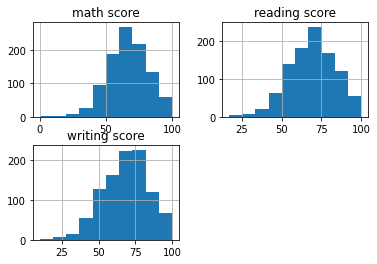

In [ ]:
# persebaran data secara keseluruhan
df_clean.hist()
plt.show()

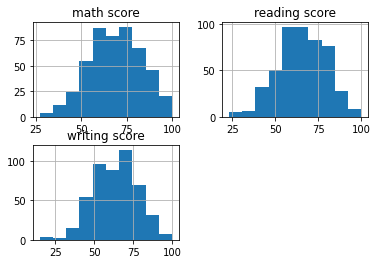

In [ ]:
# persebaran data siswa laki-laki dalam bentuk histogram
df_clean_male.hist()
plt.show()

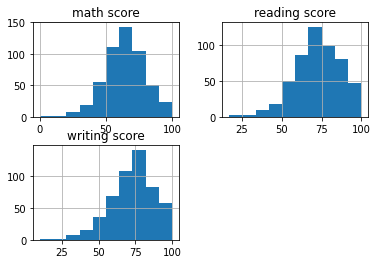

In [ ]:
# persebaran data siswa perempuan dalam bentuk histogram
df_clean_female.hist()
plt.show()

In [ ]:
num_of_numerical_cols = df_clean._get_numeric_data().columns.shape[0]
print(num_of_numerical_cols, 'numerical columns')
name_of_numerical_cols = df_clean._get_numeric_data().columns
print(name_of_numerical_cols)

3 numerical columns
Index(['math score', 'reading score', 'writing score'], dtype='object')


In [ ]:
# Predictors kita beri simbol X besar
# targets kita beri simbol y kecil

X = df_clean[['gender', 'math score', 'reading score']].sample(10)
print(X)

     gender  math score  reading score
18     male          46             42
123    male          63             57
649  female          69             79
885  female          62             76
477    male          80             68
20     male          66             69
147    male          73             68
250    male          47             49
630    male          67             64
249    male          68             60


In [ ]:
# Split into training and testing set

predictors = df_clean[['math score', 'reading score']] # explanatory variable
targets = df_clean.gender

X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size = .2, random_state = 0)

In [ ]:
print('X_train = ', X_train.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

X_train =  (800, 2)
X_test =  (200, 2)
y_train =  (800,)
y_test =  (200,)


In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
confussion_array = sklearn.metrics.confusion_matrix(y_test, predictions)

print(confussion_array)

[[87 12]
 [25 76]]


In [ ]:
print('TN = ', confussion_array[0,0]) # true negative
print('FN = ', confussion_array[1,0]) # false negative
print('TP = ', confussion_array[1,1]) # true positive
print('FP = ', confussion_array[0,1]) # false positive

TN =  87
FN =  25
TP =  76
FP =  12


In [ ]:
# hitung accuracy
print('Akurasi = ', sklearn.metrics.accuracy_score(y_test, predictions))
print('Error = ', 1 - sklearn.metrics.accuracy_score(y_test, predictions))

Akurasi =  0.815
Error =  0.18500000000000005


In [ ]:
clf = DecisionTreeClassifier(max_depth = 3)

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

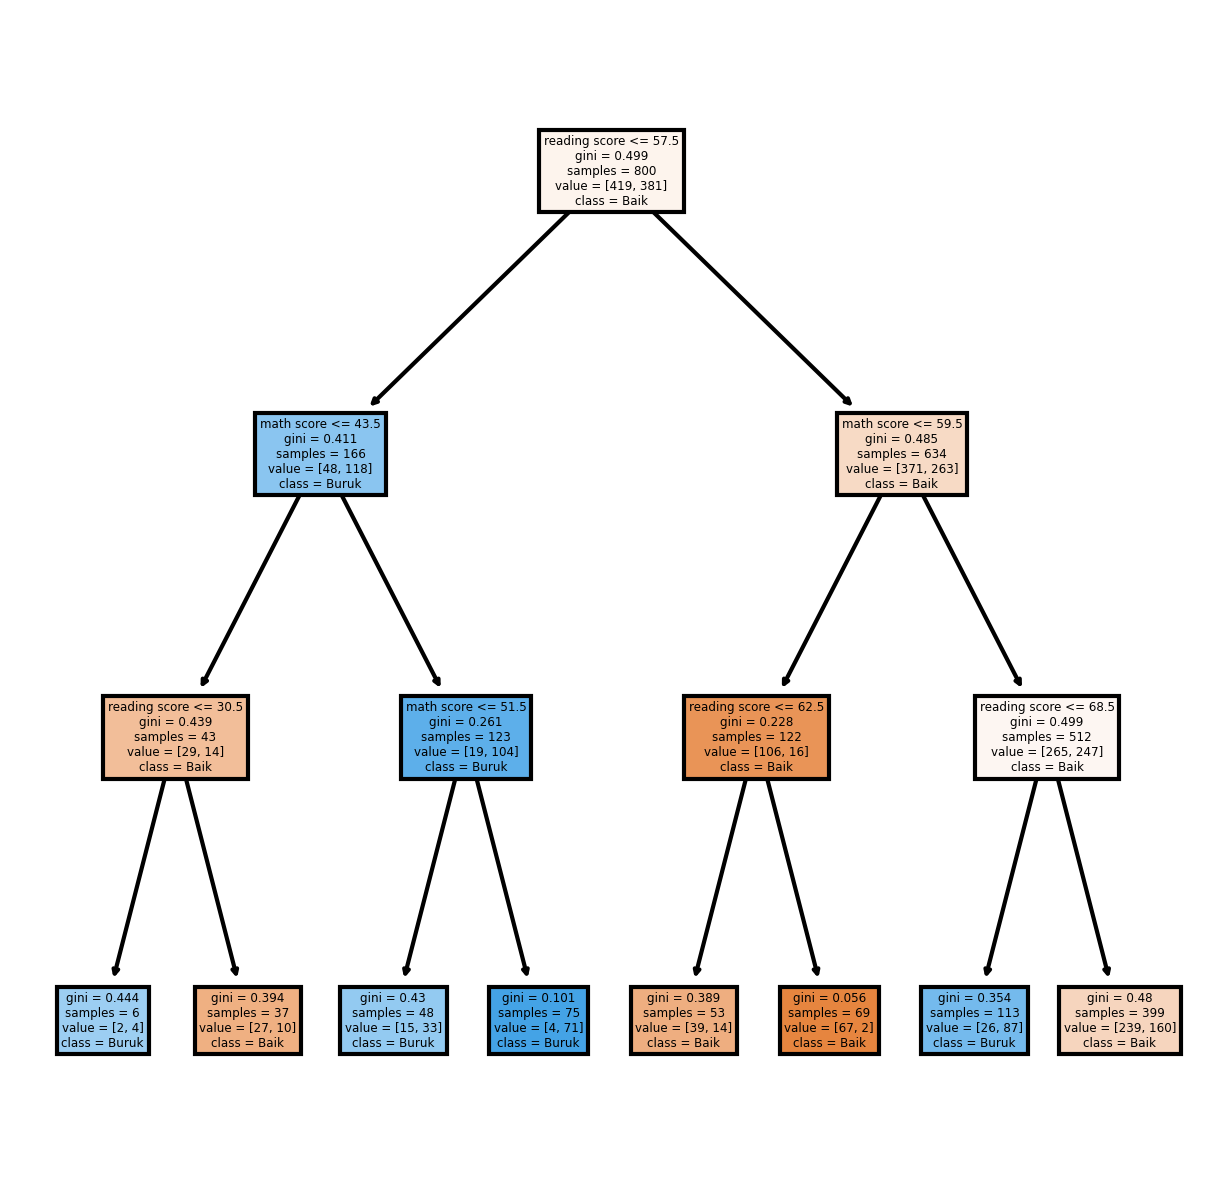

In [ ]:
fn=['math score','reading score','writing score']
cn=['Baik', 'Buruk']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf,feature_names = fn, class_names=cn, filled = True);
fig.savefig('imagename.png')
